# Comprehensive Stock Analysis and Prediction Task

#### Importing the libraries.

In [79]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

## 1. Data Validation and Cleaning:
####    Loading dataset (NSEI.csv)


In [80]:
df = pd.read_csv('NSEI.csv')
df.info


<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2013-04-05   5568.100098   5577.299805   5534.700195   5553.250000   
1     2013-04-08   5550.500000   5569.200195   5537.049805   5542.950195   
2     2013-04-09   5568.750000   5603.049805   5487.000000   5495.100098   
3     2013-04-10   5536.250000   5569.250000   5477.200195   5558.700195   
4     2013-04-11   5601.649902   5610.649902   5542.850098   5594.000000   
...          ...           ...           ...           ...           ...   
2708  2024-03-28  22163.599609  22516.000000  22163.599609  22326.900391   
2709  2024-04-01  22455.000000  22529.949219  22427.750000  22462.000000   
2710  2024-04-02  22458.800781  22497.599609  22388.150391  22453.300781   
2711  2024-04-03  22385.699219  22521.099609  22346.500000  22434.650391   
2712  2024-04-04  22592.099609  22619.000000  22303.800781  22514.650391   

         Adj Close    Volume  
0      5553.250000  1375

In [81]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500.0
2709,2024-04-01,22455.000000,22529.949219,22427.750000,22462.000000,22462.000000,0.0
2710,2024-04-02,22458.800781,22497.599609,22388.150391,22453.300781,22453.300781,289500.0
2711,2024-04-03,22385.699219,22521.099609,22346.500000,22434.650391,22434.650391,309600.0
2712,2024-04-04,22592.099609,22619.000000,22303.800781,22514.650391,22514.650391,401000.0


In [82]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-03-28,2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500.0
2024-04-01,2024-04-01,22455.000000,22529.949219,22427.750000,22462.000000,22462.000000,0.0
2024-04-02,2024-04-02,22458.800781,22497.599609,22388.150391,22453.300781,22453.300781,289500.0
2024-04-03,2024-04-03,22385.699219,22521.099609,22346.500000,22434.650391,22434.650391,309600.0
2024-04-04,2024-04-04,22592.099609,22619.000000,22303.800781,22514.650391,22514.650391,401000.0


# 2. Stock Analysis:
#### Statistical measures
#### Exploratory Data Analysis (EDA)

In [83]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2713,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2.699000e+03
mean,2018-10-06 11:34:15.436785920,11747.363099,11802.482345,11672.645543,11739.307379,11739.307379,2.986834e+05
min,2013-04-05 00:00:00,5233.450195,5317.700195,5118.850098,5285.000000,5285.000000,0.000000e+00
25%,2016-01-07 00:00:00,8287.100097,8332.674805,8231.225097,8286.674805,8286.674805,1.717500e+05
50%,2018-10-05 00:00:00,10660.799805,10713.299805,10596.349609,10651.799805,10651.799805,2.371000e+05
75%,2021-07-07 00:00:00,15762.125000,15835.174805,15679.450195,15750.050293,15750.050293,3.560500e+05
max,2024-04-04 00:00:00,22592.099609,22619.000000,22430.000000,22514.650391,22514.650391,1.811000e+06
std,NaN,4370.766646,4385.496171,4349.702589,4369.516272,4369.516272,1.935206e+05


In [84]:
dataset = pd.DataFrame(df[['Close']])
dataset.tail()

,Close
Date,
2024-03-28,22326.900391
2024-04-01,22462.000000
2024-04-02,22453.300781
2024-04-03,22434.650391
2024-04-04,22514.650391


#### Analyzing the field "close" of the dataset.

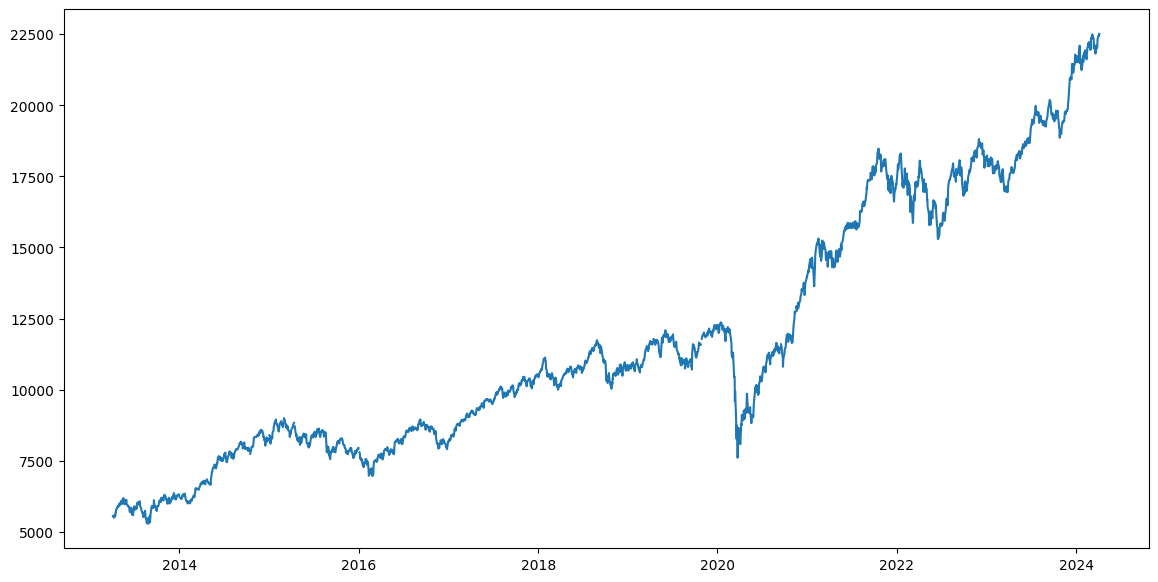

In [85]:
plt.figure(figsize=(14,7))
plt.plot(dataset,label='Close Price history')

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2713 entries, 2013-04-05 to 2024-04-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2699 non-null   float64
dtypes: float64(1)
memory usage: 42.4 KB


In [87]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2699 entries, 2013-04-05 to 2024-04-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2699 non-null   float64
dtypes: float64(1)
memory usage: 42.2 KB


In [88]:
dataset.tail()

,Close
Date,
2024-03-28,22326.900391
2024-04-01,22462.000000
2024-04-02,22453.300781
2024-04-03,22434.650391
2024-04-04,22514.650391


## 3. Predictive Modeling: (LSTM Model)
#### Splitting data for training

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.01556909],
       [0.0149713 ],
       [0.0121941 ],
       [0.01588542],
       [0.0179342 ]])

In [90]:
window_size = 50

x_data, y_data = [],[]

for i in range(window_size, len(scaled_data)):
    x_data.append(scaled_data[i-window_size:i,0])
    y_data.append(scaled_data[i,0])

x_data, y_data = np.array(x_data), np.array(y_data)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))
y_data = np.reshape(y_data, (y_data.shape[0], 1))

x_data.shape, y_data.shape

((2649, 50, 1), (2649, 1))

In [91]:
train_size = 0.8

x_train, x_test = x_data[:(int)(len(x_data)*train_size)], x_data[(int)(len(x_data)*train_size):]
y_train, y_test = y_data[:(int)(len(y_data)*train_size)], y_data[(int)(len(y_data)*train_size):]

y_original = dataset[window_size + len(y_train):]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_original.shape

((2119, 50, 1), (2119, 1), (530, 50, 1), (530, 1), (530, 1))

## 4. Deployment and Monitoring: (LSTM model)

In [92]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(1))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
from keras.losses import mean_squared_error
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(x_train, y_train, epochs=60, batch_size=128, verbose=2)

Epoch 1/60
17/17 - 2s - 122ms/step - loss: 0.0270 - mae: 0.1196
Epoch 2/60
17/17 - 0s - 27ms/step - loss: 0.0033 - mae: 0.0433
Epoch 3/60
17/17 - 0s - 28ms/step - loss: 6.6653e-04 - mae: 0.0192
Epoch 4/60
17/17 - 0s - 27ms/step - loss: 4.1222e-04 - mae: 0.0146
Epoch 5/60
17/17 - 1s - 30ms/step - loss: 3.3823e-04 - mae: 0.0131
Epoch 6/60
17/17 - 0s - 29ms/step - loss: 3.2553e-04 - mae: 0.0127
Epoch 7/60
17/17 - 0s - 29ms/step - loss: 3.2886e-04 - mae: 0.0126
Epoch 8/60
17/17 - 1s - 30ms/step - loss: 3.2902e-04 - mae: 0.0126
Epoch 9/60
17/17 - 1s - 30ms/step - loss: 3.1339e-04 - mae: 0.0124
Epoch 10/60
17/17 - 1s - 30ms/step - loss: 3.0214e-04 - mae: 0.0122
Epoch 11/60
17/17 - 1s - 30ms/step - loss: 3.1016e-04 - mae: 0.0120
Epoch 12/60
17/17 - 1s - 30ms/step - loss: 3.0113e-04 - mae: 0.0121
Epoch 13/60
17/17 - 1s - 29ms/step - loss: 3.0818e-04 - mae: 0.0123
Epoch 14/60
17/17 - 0s - 29ms/step - loss: 3.2109e-04 - mae: 0.0123
Epoch 15/60
17/17 - 1s - 30ms/step - loss: 3.0505e-04 - mae: 0.0

In [68]:
y_pred = model.predict(x_test)
print('Loss: ', sum(keras.losses.mean_squared_error(y_test, y_pred))/len(y_pred))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Loss:  tf.Tensor(0.0004365284, shape=(), dtype=float32)


In [78]:
closing_price = scaler.inverse_transform(y_pred)
print(closing_price[:5])

[[17243.734]
 [17260.168]
 [17271.238]
 [17239.803]
 [17221.947]]


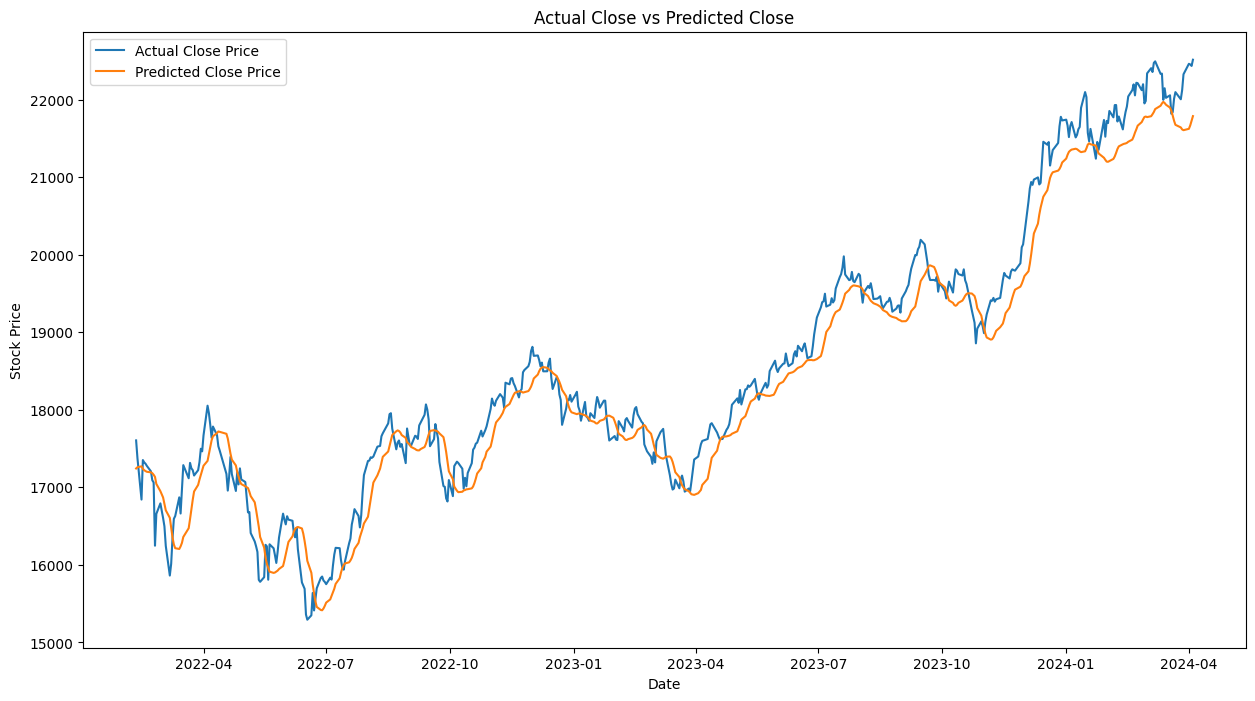

In [70]:
validation = y_original
validation['Predictions'] = closing_price

plt.figure(figsize=(15,8))
plt.plot(validation['Close'], label="Actual Close Price")
plt.plot(validation['Predictions'], label="Predicted Close Price")
plt.title("Actual Close vs Predicted Close")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()